This code is taken from `pulse_optimization/evaluation_and_directions` with the computations stripped out, just to plot.

In [1]:
import sys
sys.path.insert(1, 'pulse_optimization/src/')

In [6]:
import jax
jax.config.update("jax_enable_x64", True)

# tell JAX we are using CPU
jax.config.update('jax_platform_name', 'cpu')

import jax.numpy as jnp
import numpy as np

# dimension
dim = 4

# some fixed model parameters
freq = 4.725
anharm = -0.35
r = 0.08

# operators
a = np.diag(np.sqrt(np.arange(1, dim)), 1) + 0j
adag = np.diag(np.sqrt(np.arange(1, dim)), -1) + 0j
N = np.diag(np.arange(dim)) + 0j

static_hamiltonian = 2 * np.pi * freq * N + np.pi * anharm * N * (N - np.eye(dim)) + 0j
drive_hamiltonian_X = 2 * np.pi * r * (a + adag) + 0j

freq_operator = N + 0j

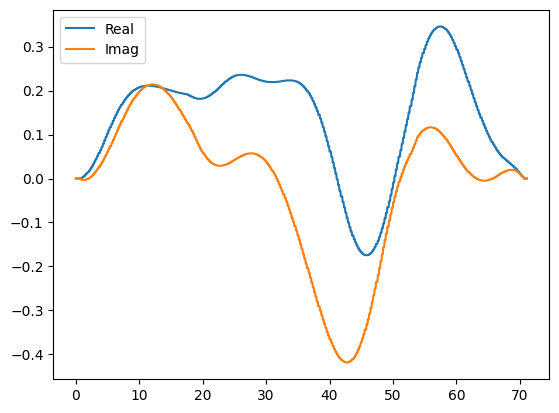

In [3]:
from parameterization import chebyshev_parameterization

dt = 1 / 4.5 # sample width
n_steps = 240 # base number of time steps
n_zeros = 40 # amount of padding used in convolution for smoothing
cutoff_freq = 0.3
num_params = 10

T = (n_steps + 2 * n_zeros) * dt

example_sig = chebyshev_parameterization(
    I_params=np.random.rand(10),
    Q_params=np.random.rand(10),
    dt=dt,
    cutoff_freq=cutoff_freq,
    n_steps=n_steps,
    n_zeros=n_zeros
)
example_sig.draw(0, dt * len(example_sig.samples), 1000, function="envelope")

In [4]:
# use the same function for I and Q components
signal_func = lambda x, y, phase: chebyshev_parameterization(
    I_params=x,
    Q_params=y,
    dt=dt,
    n_steps=n_steps,
    n_zeros=n_zeros,
    phase=phase,
    cutoff_freq=cutoff_freq,
    carrier_freq=freq
)

pi2 = np.pi/2

signal_parameterizations = {
    "sigX": lambda opt_parameters: signal_func(
        x=opt_parameters["I_params"],
        y=opt_parameters["Q_params"],
        phase=opt_parameters["phase"]
    )
}

Parameters taken from optimization

In [7]:
# best performing parameters
opt_params ={
    'I_params': jnp.array([ 0.08432198, -4.0976586 , -5.781624  , -8.55092   , -5.458835  ,
         0.18667547,  6.4387    ,  7.008362  ,  4.511104  ,  1.9051901 ,
        -3.574085  , -0.0216548 ,  1.9599719 ,  1.7783914 , -1.989886  ,
        -0.8524528 , -0.24872959,  1.416902  ,  0.673748  ,  0.47093   ]), 
    'Q_params': jnp.array([ 4.198883  , -1.4582886 ,  1.8140087 , -1.2474163 ,  1.5403961 ,
        -2.8162842 , -3.8921468 ,  1.7678754 , -3.2438188 ,  2.8344529 ,
         3.2317514 , -0.57384133,  0.03444064,  1.1026036 ,  2.0887687 ,
        -0.35428742, -3.036116  ,  2.3634195 , -1.1164097 ,  0.7448784 ]), 
    'phase': jnp.array(2.5150995)
}

# Plotting the pulse.

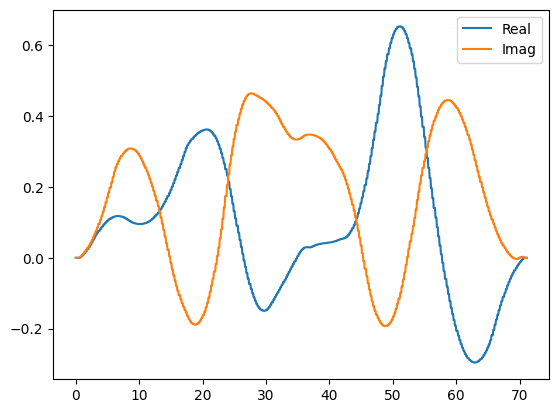

In [9]:
sig = signal_parameterizations['sigX'](opt_params)
sig.draw(0, T, 1000, function="envelope")

Copied from `pulse_optimization/evaluation_and_directions`

In [13]:
directions = {'I_params': jnp.array([[ 4.96774433e-01, -4.39219575e-01,  7.68795650e-02,
          3.29039617e-01, -3.37245318e-01,  1.67246344e-01,
         -1.09646321e-01,  1.24800311e-01,  3.84704564e-02,
         -1.97034240e-01,  1.48230892e-01, -9.72538728e-02,
         -1.42250977e-02,  8.84844155e-02,  1.28307394e-03,
         -8.84181948e-02,  1.35745133e-01, -2.38635216e-02,
         -1.65360934e-01,  1.98194864e-01],
        [ 7.06769381e-02, -2.33713257e-02, -4.99289576e-02,
          3.56545289e-02,  6.67264354e-02, -7.63162477e-02,
         -4.29856302e-02,  8.14803369e-02, -1.27357711e-02,
         -1.08189559e-02, -3.50752609e-03, -1.71965347e-02,
          4.08443001e-02, -1.87886755e-02, -8.72290045e-03,
          8.81462954e-03,  7.56816895e-03, -2.18251951e-02,
         -2.10586001e-02,  6.02392350e-02],
        [-7.26931121e-02, -1.75108002e-01,  2.45162147e-01,
          9.45131093e-02, -2.73721190e-01,  1.23971326e-01,
          8.99533899e-02,  1.38630852e-02, -6.52482608e-02,
         -5.95415498e-02,  6.34803730e-02, -7.21556057e-02,
         -2.57254988e-02,  6.00085139e-02,  5.45888774e-02,
         -5.49194570e-02,  4.36836106e-02,  5.37860841e-02,
         -7.96648988e-02, -2.88808188e-02],
        [ 2.17971073e-01,  6.28540820e-02, -5.41066052e-02,
         -1.88209592e-01, -1.33506340e-01,  3.47984493e-01,
         -1.35465104e-02, -3.25536111e-01,  7.77546024e-02,
          8.80118778e-02,  9.60037295e-02,  7.80370701e-02,
         -1.21892230e-01, -1.68961229e-02, -1.49642409e-02,
         -5.47694570e-02, -6.18437595e-03,  6.12927570e-02,
          6.58025016e-02, -1.14562403e-01],
        [ 3.62726810e-01,  1.36188077e-01, -3.58012008e-01,
         -1.38100092e-01,  1.88886969e-01,  8.71549265e-02,
         -5.64380865e-02, -1.67187481e-01,  1.14827178e-02,
          9.00220851e-02,  7.97931843e-02,  6.51902576e-02,
         -6.93690162e-02, -3.24369285e-02, -7.69609603e-02,
          9.45620970e-03,  3.30364118e-02, -1.13933009e-02,
          2.74590537e-02, -1.69699877e-02],
        [-2.79094898e-01,  9.55718895e-02,  3.88682191e-01,
         -1.53025562e-01, -4.31054434e-01,  2.05410763e-01,
          1.37113628e-01, -2.43026767e-01,  2.82535248e-03,
          1.06711974e-01,  1.30926664e-01,  6.63023485e-02,
         -1.08841332e-01,  3.28568548e-03, -1.18922700e-02,
         -1.24186714e-01, -7.75056114e-02,  1.24250345e-01,
          8.21405764e-02, -1.61912440e-01],
        [-2.46560906e-01, -6.90091533e-02,  2.41594317e-01,
          3.32015873e-02, -2.63787043e-02, -5.87856123e-02,
         -1.90489197e-01,  2.44869175e-01,  1.70441347e-01,
         -2.19862046e-01, -1.67733179e-01,  1.22749979e-01,
          1.68962500e-01, -1.98695227e-01,  8.17739135e-03,
          1.84462467e-01, -8.63487381e-02, -9.78149950e-02,
          3.75245293e-02,  7.12249404e-02],
        [-1.81449378e-01,  8.24770219e-02, -1.09980011e-01,
          2.96699738e-01, -7.54144630e-02, -4.25410085e-01,
          4.23462368e-01, -1.48781846e-02, -9.61890615e-02,
         -4.52722350e-02,  9.40216159e-03,  1.40790769e-01,
         -2.01358115e-01,  1.95902301e-01, -1.24243136e-01,
         -8.24622737e-02,  2.43400452e-01, -1.00782048e-01,
         -1.30721445e-01,  6.20789654e-02],
        [ 6.86334143e-02, -9.01355191e-03, -8.00882498e-02,
          9.20283842e-02, -1.05000671e-02,  4.90880711e-02,
         -1.74420869e-01, -7.96003571e-02,  3.49437421e-01,
         -1.26811665e-01, -1.56057170e-01,  1.48752876e-01,
         -3.74946476e-02,  2.79044166e-02, -4.09718105e-02,
          5.00762713e-02, -5.03690570e-02, -1.15341349e-01,
          1.38175547e-01,  7.78244096e-02],
        [ 4.57192850e-02, -4.88935728e-02,  6.23847186e-03,
          4.32701217e-02, -3.46980622e-02,  7.21878334e-03,
          9.52107463e-02, -2.68022329e-01,  2.87559317e-01,
          2.15128427e-02, -3.10650486e-01,  2.38931501e-01,
         -5.27227430e-02, -4.66583624e-02,  9.58927210e-02,
         -1.03257607e-01,  1.12710285e-01, -1.12445352e-01,
          3.34378800e-02,  1.15691675e-01],
        [-1.92288208e-01, -2.18283174e-01,  3.03366282e-02,
         -3.80031644e-03,  2.32711235e-01,  2.67492951e-01,
         -6.57551365e-02,  7.65071508e-03,  5.73806779e-02,
         -6.35541535e-02, -3.25587253e-01, -2.28617226e-01,
          1.05549358e-01,  8.98519989e-02,  2.95494674e-01,
          1.00694385e-01, -5.51070198e-02,  2.92138665e-02,
          1.77534792e-02, -1.16226095e-01],
        [ 1.90011438e-01, -1.71537189e-03,  2.07672614e-01,
         -2.74959803e-01,  1.35338800e-02, -1.62792560e-01,
         -3.38783044e-02,  1.90070910e-01, -2.86158457e-01,
          2.13153352e-01,  1.23693242e-01,  3.03017692e-02,
          2.60142949e-01, -4.40860311e-01,  2.56071305e-02,
         -8.61822637e-02,  3.23905947e-02,  7.43003512e-02,
         -1.55307982e-01,  1.55270898e-01],
        [ 1.46624799e-02,  2.03765585e-01,  4.09188170e-02,
         -4.26295950e-02, -1.78396935e-01, -8.19129428e-02,
         -2.33826734e-01,  1.21528468e-01,  1.53046978e-01,
         -1.44158905e-01,  2.29984418e-01,  2.20876237e-01,
         -2.11177634e-02, -1.29383870e-01, -2.91861271e-01,
          1.21026932e-01, -1.27105462e-01, -6.01053338e-02,
          1.25551765e-01,  3.37535764e-02],
        [-5.32097239e-02, -8.05341961e-02, -1.42506014e-01,
         -8.23831323e-02,  1.06177846e-01,  2.94437016e-01,
          2.10815564e-01,  4.84184439e-02, -3.02114625e-01,
         -2.49486304e-01,  9.38385291e-02, -7.41517295e-03,
         -5.64592946e-02, -6.75353091e-02,  1.73664314e-02,
          3.21841886e-01,  2.11738396e-01,  3.45500045e-03,
         -2.41721174e-01, -2.79516714e-01],
        [-5.00517972e-02,  4.71818035e-02, -5.56389456e-02,
         -2.70910745e-02, -7.08408453e-02,  1.50193574e-01,
          3.71242774e-02,  3.77369521e-02,  2.24118020e-02,
         -3.30420034e-01,  7.35209249e-02,  2.74954930e-01,
         -6.22597953e-02, -1.74921763e-01, -1.68090115e-01,
          3.41880915e-01,  1.14494986e-01, -1.32176048e-01,
         -7.44386002e-02, -1.23730083e-01],
        [ 8.46391488e-02, -1.09845624e-01,  1.60181196e-01,
         -1.29611716e-01,  1.60858964e-01, -8.88961189e-02,
          8.12102315e-02, -6.84712506e-02,  2.89726056e-03,
         -6.25051769e-02, -3.71706357e-02,  2.54990247e-01,
         -1.72087581e-01, -1.42931731e-01,  3.67463107e-01,
         -2.51730854e-01,  6.55485078e-02, -4.52519015e-02,
         -2.29958047e-02,  8.39507387e-02],
        [-4.25143025e-03,  3.59438896e-02, -9.56094485e-02,
          2.13551386e-01, -4.50217390e-02, -7.57254948e-02,
         -8.09445858e-03, -3.74521721e-02, -6.36917985e-03,
          7.70932118e-02,  1.56245391e-01, -2.92761065e-01,
          8.23303033e-02,  1.75388090e-01, -1.07148269e-01,
          1.23985576e-01, -3.93462977e-01,  1.86558420e-01,
          1.02567274e-01, -3.28196467e-02],
        [ 2.66600197e-03,  4.67619693e-02, -5.65663035e-02,
          8.27357748e-02,  1.99845860e-02, -5.91697529e-02,
          3.17404072e-02, -3.54571737e-02,  8.51528476e-02,
         -1.24140329e-01,  9.73533816e-02,  4.75547611e-03,
         -5.40824271e-02, -5.84781438e-02,  1.24532530e-01,
          2.48590850e-02, -2.17453786e-01,  2.32561402e-01,
         -1.16836574e-01,  7.79277405e-03],
        [-1.48472021e-02,  6.12605917e-02, -1.88787165e-01,
          1.33609356e-01, -3.26187160e-02, -4.65451333e-02,
          2.70865963e-02,  2.89972837e-02,  5.76896798e-02,
         -2.14447454e-01,  2.14908276e-02,  2.48246949e-01,
         -1.22895631e-01, -2.02544424e-01,  3.12239040e-01,
         -8.81103804e-02, -2.86089446e-01,  4.65994357e-01,
         -2.39800208e-01, -2.24375477e-02],
        [ 1.59300440e-01, -2.34004220e-01,  1.15733784e-01,
         -4.07473793e-02,  3.78851540e-02, -1.39329544e-01,
          2.93796395e-01, -1.61859334e-01,  4.61940365e-02,
          4.22427855e-02, -8.36938595e-02,  2.55647693e-02,
          5.17214531e-02, -1.36746141e-01, -8.06647175e-02,
          2.41580672e-01, -1.03304118e-01,  4.17837253e-02,
          9.04489548e-02, -1.95932410e-02],
        [ 8.21060794e-02, -1.47322240e-01,  1.43563032e-01,
         -3.51070569e-02,  1.68281950e-01, -1.47815506e-01,
          7.87592697e-02, -1.01988213e-01, -4.63203975e-04,
         -1.49065520e-01,  2.28460579e-01, -2.54512534e-02,
         -7.38040460e-02,  5.93451534e-02,  3.85761588e-02,
          8.29241786e-02, -1.89747282e-01, -8.43743822e-02,
          1.62587374e-01, -8.05623519e-02],
        [-1.47318135e-01,  1.00866161e-02, -2.05014887e-01,
         -2.04080444e-01, -1.55035198e-01, -3.24585127e-02,
         -1.21753947e-01,  7.17854534e-02,  1.76540699e-01,
         -4.04545671e-02, -4.82300272e-02, -1.58627639e-01,
          7.99101965e-02,  1.62202248e-02, -8.41838015e-02,
         -1.57690772e-01,  2.82211922e-01,  1.81078529e-01,
         -1.27984631e-01, -3.83826173e-03],
        [-5.10078094e-02,  4.31553657e-02,  1.14068108e-01,
         -1.47701736e-01,  2.35177675e-01, -2.32215782e-02,
         -2.31077386e-01,  2.48894882e-01,  5.04833753e-03,
         -2.36544561e-01,  3.34174187e-01, -1.90276667e-02,
         -3.76088986e-01,  2.53942767e-01,  1.66530045e-01,
         -2.49420510e-01,  3.46770560e-02, -4.82122243e-02,
          1.36539584e-01, -9.57467781e-02],
        [-3.01589722e-02,  1.56898804e-01, -1.40304576e-01,
          4.40763720e-01, -1.34956783e-01,  1.97895335e-01,
         -2.16775257e-01,  1.95337302e-01, -3.19737072e-01,
          2.71702756e-01, -1.34512147e-01,  2.18896163e-01,
         -2.56022293e-02, -1.32897798e-01,  1.36577707e-01,
         -1.32727334e-01,  1.06469968e-02, -1.36173140e-01,
          1.72190411e-01, -2.35492487e-01],
        [-2.14315056e-01,  2.57025600e-01, -6.40469356e-02,
          5.83741605e-02,  2.73554891e-02,  2.05228250e-01,
         -8.87952104e-02, -1.03457438e-01,  1.22328190e-01,
         -4.85581691e-03,  1.17406394e-01, -1.32145302e-01,
          6.27901786e-02, -4.64993998e-02,  3.76068904e-02,
         -5.78446607e-02,  1.02505463e-01, -5.80193862e-03,
         -3.50471235e-01,  3.77686268e-01],
        [-6.01515158e-02,  1.47430790e-01,  1.24808742e-01,
          2.37420607e-01,  1.46847858e-01,  1.17578051e-01,
          2.71718599e-03, -3.04309379e-01, -1.45913449e-01,
         -3.00673204e-02,  2.75584316e-01, -4.20627414e-02,
          1.01098391e-01, -9.34331219e-02,  2.11261892e-01,
          6.34769729e-02, -1.22391824e-01, -4.58060371e-01,
         -3.85439362e-02,  2.21835875e-01],
        [-9.05865388e-02,  3.42938988e-03, -3.77861566e-02,
         -6.19370728e-02,  1.95785722e-03,  1.10993181e-01,
         -3.20253185e-03, -4.84793657e-02, -9.33780333e-02,
          3.18027485e-02, -1.64224355e-02,  5.53789310e-02,
         -8.22903196e-02,  1.28860249e-01, -4.65802964e-02,
          1.38661077e-01, -1.99953574e-01,  6.40525419e-02,
         -1.81374516e-01,  3.72473448e-01],
        [-1.55400038e-01, -1.38828780e-01, -3.52067356e-01,
         -1.52647602e-01, -2.35195320e-01, -2.13840109e-02,
          1.38416091e-01,  1.25529066e-02, -5.92121171e-02,
         -1.57160903e-01,  1.44288157e-01, -1.51910566e-01,
          6.28782193e-02, -1.91128434e-01,  2.16751011e-01,
         -4.69664301e-02,  7.82367261e-02, -1.20519754e-01,
          4.46697111e-01,  2.03099786e-01],
        [-8.89030574e-02, -1.47675965e-01, -1.90426192e-01,
         -2.11215226e-01, -1.82633945e-01,  8.15898860e-02,
          6.96662441e-03,  1.67764060e-01, -2.47815686e-01,
          9.26506625e-02, -1.24458780e-01,  1.14378791e-01,
         -2.72247892e-01,  1.07759934e-01,  6.05410317e-02,
          1.68778372e-01, -1.08733587e-01,  2.88372156e-02,
          2.07556002e-01,  3.86909884e-01],
        [-7.09325697e-02, -2.23448987e-01, -1.49167634e-01,
          9.63298996e-02, -4.07348949e-02, -1.04660234e-01,
         -1.31198560e-01, -1.63168363e-01, -1.56612556e-01,
         -1.40010441e-03,  2.67383188e-02,  2.30443808e-01,
          1.38684212e-01, -2.93222432e-03,  1.10551602e-02,
         -6.98372039e-02, -2.01162513e-01,  5.66066048e-02,
         -5.24182131e-02, -1.67120037e-01],
        [-8.78935670e-02, -1.70992821e-01,  4.46022649e-02,
         -1.39092342e-01,  2.47360755e-02, -9.09999187e-02,
         -2.74334843e-01, -7.90326451e-02, -5.04514361e-04,
          1.61086687e-01,  6.49601382e-03,  8.20648782e-02,
         -1.00796137e-01,  1.49128576e-01, -8.70508127e-02,
          1.49919302e-02,  4.21684784e-02, -1.69038764e-01,
         -2.89525439e-01, -9.02486859e-02],
        [-2.78859851e-01, -3.76779914e-01, -2.30389943e-01,
          3.46433061e-02, -2.46494997e-02, -1.93085450e-01,
         -2.62146281e-01, -3.01348226e-01,  5.14237226e-02,
          4.74616393e-02,  2.55222596e-01, -3.98994848e-02,
          9.03575977e-02, -2.03169672e-01, -1.87865552e-02,
         -7.20411665e-02,  1.34288315e-01, -2.48560659e-02,
         -1.32972127e-02, -1.52453858e-01],
        [-3.96374016e-02, -6.61974893e-02,  2.66832072e-02,
         -5.62998104e-02,  1.78007418e-01,  1.70713388e-01,
          3.31981086e-02, -8.43546801e-02, -2.73271764e-01,
         -3.17845717e-01, -7.09454003e-02,  3.01645465e-01,
          4.25214200e-01,  2.70260797e-01, -3.16713021e-01,
         -3.71163493e-01, -3.37762523e-02,  1.17145652e-01,
          1.34212053e-01,  9.97908058e-02],
        [-2.81292575e-02, -2.00796972e-01,  2.67883477e-02,
         -8.96720003e-02, -2.55917970e-02, -9.49318213e-02,
         -1.98577022e-01, -3.87578973e-02, -1.19267583e-01,
          1.93907479e-01, -8.19066475e-02,  1.18007707e-01,
         -2.48200083e-01,  1.00186933e-01, -4.46046931e-02,
          1.65273174e-01, -8.88504109e-02, -5.39475861e-02,
         -1.39314413e-01, -2.11255257e-04],
        [-1.08880373e-01, -1.07318783e-01, -6.22710678e-02,
         -7.64568806e-02, -8.37595424e-03,  1.41425249e-02,
         -1.14317779e-01, -1.26769341e-01, -1.55547193e-01,
         -1.77413529e-02,  6.53213713e-03,  9.78281636e-02,
         -3.80646570e-03,  1.01430363e-01, -3.93285463e-02,
         -7.89370497e-04, -1.29780986e-01, -6.82215592e-02,
         -1.18279059e-01,  1.68701107e-01],
        [-1.39836308e-01, -1.46903792e-01,  1.03030404e-01,
          2.05343578e-01,  2.66236552e-01,  9.14526984e-02,
         -7.36211257e-02, -1.19879422e-01, -2.16269990e-02,
          7.72500723e-02,  1.27314872e-01,  4.43254352e-02,
         -1.40290819e-01, -1.48550304e-01, -1.72281799e-01,
          7.79232574e-02,  2.19216750e-01,  3.49190808e-01,
          1.98220939e-01,  2.11646156e-01],
        [-1.00156105e-01, -1.42886488e-01,  9.95064948e-02,
          2.03831287e-01,  2.73233051e-01,  2.01288454e-01,
          6.41077341e-02,  1.26910887e-01,  1.01589216e-01,
          2.39933480e-01,  1.01980475e-01,  6.39206151e-02,
         -2.00399788e-01, -1.65011143e-01, -2.14656255e-01,
         -3.29096661e-03,  1.27781730e-01,  1.77797692e-01,
          1.36860586e-01,  8.90888564e-02],
        [-1.31331846e-01, -2.18283156e-01, -1.79482162e-01,
         -3.64364271e-02,  9.37379652e-02,  2.28003013e-01,
          3.29591361e-01,  2.88678267e-01,  2.86109516e-01,
          1.71241841e-01,  1.65551740e-01,  3.89257856e-02,
          1.99738659e-02, -1.30796607e-01, -1.65438668e-01,
         -2.83074045e-01, -2.99788637e-01, -2.55165724e-01,
         -1.44967675e-01, -5.84908449e-02],
        [-2.50061279e-02, -1.16710813e-01, -6.09733807e-02,
         -8.60216366e-02,  5.99707830e-03,  7.84594417e-02,
          1.12874812e-01,  1.50534643e-01,  6.30142631e-02,
          1.03545300e-01, -4.04790202e-03,  6.95771509e-02,
         -4.51435179e-02,  3.21093693e-02, -8.15135687e-02,
         -7.67468566e-02, -1.84981057e-01, -1.38291193e-01,
         -1.02985874e-01, -1.71499914e-02],
        [-8.18417466e-03, -2.18562583e-02, -2.25199525e-02,
         -2.46712927e-02, -1.04530919e-02,  2.13108290e-02,
          7.65914281e-02,  1.50593673e-01,  2.26872920e-01,
          2.98420295e-01,  3.44559313e-01,  3.80357174e-01,
          3.92494402e-01,  3.89218637e-01,  3.47929493e-01,
          2.86496283e-01,  1.96020561e-01,  1.10496226e-01,
          4.50728355e-02,  1.17522454e-02]]),
 'Q_params': jnp.array([[ 4.63994311e-02,  1.17951814e-01,  1.44055929e-01,
         -2.19037385e-02, -1.08915517e-01, -1.03606448e-02,
          6.98027314e-02,  7.31691864e-02,  1.69443066e-02,
         -3.74512302e-02, -6.00266981e-02, -1.27548889e-01,
         -1.20535766e-01,  1.87668597e-02,  6.46178679e-02,
         -1.55214655e-02, -4.38619943e-02, -8.66462469e-03,
         -1.70900520e-02, -3.11593763e-02],
        [ 6.40678989e-01, -1.30792120e-01, -3.87362914e-01,
          1.44676798e-01, -1.36575084e-01, -1.33088878e-02,
          2.39568748e-01, -1.27859002e-01,  2.80566056e-02,
          1.40379246e-01, -2.50471457e-01,  2.12739058e-02,
          2.69154259e-01, -1.71732301e-01, -4.22441403e-02,
          2.50890051e-01, -7.68344295e-02, -8.25696566e-02,
         -1.09737095e-02, -1.01213506e-01],
        [-1.86454793e-01, -2.75330661e-01, -1.68859019e-01,
          3.18709333e-01,  3.42729648e-01, -3.40224049e-02,
         -1.69254252e-01, -2.76687868e-01, -1.30453536e-01,
          1.52081342e-01,  1.29694849e-01,  2.46518736e-01,
          2.43179571e-01, -1.52055172e-01, -2.40958563e-01,
         -2.85116841e-02,  5.81506031e-02,  6.15946710e-02,
          1.39481798e-01,  8.46989048e-02],
        [ 2.34248904e-01,  1.90073536e-01, -2.01924004e-01,
         -1.35224519e-01,  3.57750589e-01, -5.66775774e-02,
         -2.89526733e-01,  1.89514712e-01,  1.53205579e-01,
         -1.28356071e-01, -1.06185383e-01, -5.24277197e-02,
          6.14104163e-03, -2.73430377e-02, -1.64951383e-01,
          6.82300321e-02,  2.31769300e-01, -1.59741592e-01,
         -1.29912285e-01,  1.12548244e-01],
        [-2.36552577e-02, -8.97294897e-02,  3.29385523e-01,
          5.13777904e-01, -4.25262480e-03, -8.47820208e-02,
         -8.35571371e-02, -1.79406733e-01,  3.48651648e-02,
          8.99857607e-02, -7.90453729e-02, -1.24874499e-01,
         -1.12849241e-01, -1.69860288e-01, -9.87494175e-02,
         -5.24712861e-02, -1.12927030e-01,  1.56852722e-01,
          1.72363824e-01, -1.24396837e-01],
        [ 8.70821961e-02, -4.05464672e-02,  1.67604558e-01,
          1.41245566e-01, -3.17408598e-01, -9.92644360e-02,
          1.45409698e-01,  3.06293376e-02,  9.15651149e-02,
          6.73279354e-02, -1.23280567e-01, -1.69881193e-01,
         -7.27389451e-02,  1.37594981e-02,  1.27936836e-01,
          6.69082859e-02, -1.36731219e-01,  4.82724679e-02,
          7.72437034e-02, -1.32705685e-01],
        [ 2.51468497e-01,  4.62084835e-03,  1.82733375e-01,
          2.06470299e-01,  1.08660030e-01,  1.08230218e-01,
         -3.71974716e-01,  1.78159028e-02,  2.82480509e-01,
         -2.24990653e-01, -7.12786996e-02, -7.37352496e-02,
         -1.82426574e-01, -6.80879054e-02, -1.55536429e-01,
         -2.16671074e-03,  1.13607882e-02,  7.13801755e-02,
          1.44511404e-02, -1.35638721e-01],
        [ 4.33323202e-02,  1.17680526e-01,  5.85957226e-02,
          1.38696682e-01,  1.26851000e-01, -2.54290499e-01,
         -1.07975960e-01,  1.74698621e-01,  8.16876104e-02,
          1.23024664e-02, -1.37488124e-01, -1.91277643e-01,
         -4.44125718e-02, -4.17764617e-02, -7.22896629e-02,
          7.11035179e-02,  7.25082450e-02, -1.23825648e-01,
          6.26014412e-02,  9.52766019e-02],
        [-2.85974950e-01, -3.26808975e-01, -1.80300076e-01,
          1.81247270e-02, -1.69703963e-01, -3.46074098e-01,
         -1.26515838e-01,  2.18576909e-01,  3.02786114e-01,
          1.09671401e-01, -4.60175696e-02,  5.57585744e-02,
          2.25503463e-01,  2.00020304e-01,  1.62662156e-01,
          1.57052421e-01, -8.57842317e-03, -2.47258601e-02,
          1.47015830e-01,  4.50379884e-02],
        [ 1.47569619e-01, -1.05526030e-01,  7.27887561e-02,
         -1.12858080e-02, -1.29652429e-01,  1.81218278e-01,
          9.10009242e-02, -2.71833757e-02, -3.25013256e-01,
         -1.39947313e-01,  4.30338965e-01, -4.94118353e-03,
         -1.43154878e-01, -9.10471287e-03, -1.96784853e-01,
          2.35374814e-01,  3.28079496e-02, -2.15711947e-01,
          1.99340571e-01,  2.34906817e-02],
        [-3.85378152e-02,  2.35781012e-01,  9.52359083e-02,
          1.63308609e-01,  1.09270753e-01, -3.24234612e-01,
          1.86188612e-01,  1.12942587e-01, -1.87393316e-01,
          1.57243016e-01, -1.50634464e-01, -2.41539630e-01,
         -2.37945840e-02, -1.10420785e-01, -3.05913686e-02,
          2.60795864e-02,  2.18401401e-02, -1.78321760e-01,
          7.12931169e-02,  1.85606637e-01],
        [-8.93375522e-02, -5.90504178e-02, -1.57929511e-02,
          2.76802213e-02, -4.78519099e-02, -2.69310104e-01,
         -6.23809955e-02,  1.65620038e-01, -2.25584291e-02,
          8.01818072e-02,  1.33940804e-01, -1.44168821e-01,
         -4.92068012e-02,  2.72905415e-02, -5.04509742e-02,
          2.50932903e-01,  1.61580943e-01, -1.58244968e-01,
          1.50142535e-01,  7.80498237e-02],
        [-2.98180711e-02,  1.50356749e-01,  5.63544551e-02,
          1.04022862e-01,  1.65267784e-01, -3.26149455e-02,
          2.68548169e-01,  9.43423352e-02, -2.83600932e-01,
         -1.21696594e-01, -9.74852952e-02,  6.17640137e-02,
          1.41525421e-01, -2.44275392e-02, -4.99116362e-02,
         -1.72037843e-01, -2.49238266e-01, -2.50514856e-01,
          1.20204598e-01,  3.15807607e-01],
        [ 6.29270677e-02, -1.73949125e-01,  2.63171467e-02,
          2.67999053e-02, -1.48142130e-01,  6.75682840e-02,
         -2.73239332e-02,  1.86004230e-01,  8.51553363e-02,
         -3.02493018e-01,  6.18563409e-02,  1.34453855e-01,
          7.58345433e-02,  1.30857448e-01, -1.07720850e-02,
          4.62512943e-02, -2.16887009e-01, -1.47422945e-01,
          2.07752390e-01,  9.06283509e-02],
        [-9.53552317e-02,  1.30715379e-01, -1.04434497e-01,
         -1.10115835e-01, -5.79818740e-02, -1.29102129e-01,
          7.27942705e-02, -1.88439517e-01, -1.25461860e-01,
          2.78872503e-01,  9.78487537e-02, -1.50723216e-02,
         -2.07298990e-01, -2.75305017e-01,  1.48292242e-01,
          2.00861288e-01,  2.94709647e-01,  1.64598593e-01,
         -1.63017795e-01, -6.59588358e-02],
        [-4.72941051e-02,  1.49790240e-01, -9.56210673e-02,
          7.07554565e-02, -3.43236065e-02, -8.28184304e-02,
          2.79293399e-02, -2.19701083e-03,  9.08246563e-02,
         -2.26708045e-01, -1.52187573e-01,  3.68343746e-01,
         -9.75324901e-02, -3.19885790e-01,  2.84176391e-01,
         -6.19078779e-02, -1.37708490e-01,  1.69094558e-01,
         -9.52554157e-03,  2.24426950e-01],
        [-2.42277813e-02,  2.69087142e-02, -1.97408649e-03,
          1.03605874e-02, -2.42125061e-02, -6.80332046e-02,
         -7.71091867e-02,  1.05040945e-01,  4.28345784e-02,
         -1.80583545e-01,  1.65432326e-01,  2.36283623e-01,
         -2.42295970e-01, -3.98773541e-01,  1.32303121e-01,
          3.83424814e-01, -4.42828750e-02, -7.98942890e-02,
          1.41846510e-01,  3.21301915e-02],
        [ 2.09708491e-02,  8.17336018e-03, -1.19539855e-01,
         -1.17522773e-01, -1.04862522e-01,  1.03746849e-02,
         -2.16744560e-01, -3.55879560e-01, -2.47474238e-01,
         -2.35547941e-01, -2.28763040e-01, -3.36883671e-01,
          4.26410675e-02,  2.23980770e-01,  6.77703949e-02,
          1.25234744e-01,  1.02316630e-01,  2.70341347e-01,
          2.86048387e-01,  2.79914137e-01],
        [-3.74083560e-02,  6.06724126e-02,  4.56943195e-02,
         -3.36178054e-02,  2.05818006e-01,  9.61342981e-02,
          1.02627729e-01,  1.51668331e-01,  1.09273821e-01,
          2.39724191e-01,  1.33428396e-01, -3.99011100e-02,
          9.59548507e-02,  1.52264480e-02, -4.23286860e-02,
          1.84495788e-02, -1.63868714e-01, -8.60901445e-02,
         -1.25649048e-02, -2.82313979e-01],
        [-2.10530693e-01, -2.37420958e-01, -1.91090320e-01,
          2.01700721e-02,  1.51386484e-01,  5.85597049e-02,
         -4.57798831e-02, -1.71139365e-01, -8.18669775e-02,
         -8.65998493e-02, -2.27812440e-01, -2.00782563e-01,
         -1.95712083e-01, -9.71127330e-03,  1.50221505e-01,
         -4.15832263e-02, -2.70256442e-01, -3.47055698e-01,
         -2.62893034e-01, -1.59982510e-01],
        [-1.02390050e-01,  3.32059031e-01, -3.87776866e-01,
          3.06417553e-01, -2.48073892e-01,  4.09250546e-02,
          8.79264804e-02,  6.34245205e-02,  1.62009127e-01,
         -4.71482599e-02,  3.17314585e-01, -1.64185963e-01,
          6.42893618e-03,  1.15425629e-01, -2.73770971e-01,
         -1.45016068e-01,  6.01680048e-02,  5.94105681e-02,
          2.11607000e-03, -4.36083133e-02],
        [-4.44137642e-02,  1.73747918e-01, -1.45016157e-01,
          3.38081108e-01,  2.54775346e-02,  2.05272237e-01,
         -6.41277732e-02, -1.56047830e-01,  1.62663384e-01,
          3.54446368e-02,  2.04078519e-01, -8.90778582e-02,
         -6.61135646e-02,  1.35565044e-01,  3.13897428e-01,
          1.97171573e-01, -1.32452551e-01, -1.31060864e-01,
         -2.02625325e-01,  2.64112231e-01],
        [ 1.82763820e-02, -3.10122494e-01,  5.87794879e-02,
         -4.40035117e-02,  2.36622095e-02, -4.75975369e-02,
         -9.26587081e-02, -4.56836770e-02, -1.23993455e-01,
         -1.90291397e-03,  3.02090833e-02, -1.20100569e-01,
         -1.89126621e-01,  6.76659274e-03, -4.04176151e-03,
          1.28042237e-01,  5.29308014e-02, -2.69048513e-01,
         -1.24743048e-01, -7.21274590e-02],
        [-7.85621727e-02, -2.54379707e-02, -3.13371276e-01,
          1.22321219e-01, -3.26419885e-02,  4.58661806e-02,
         -3.77665313e-02,  5.63907219e-04, -4.24989951e-02,
         -8.79370961e-02,  2.57681863e-02, -1.64821323e-01,
         -1.96001133e-01, -1.66975411e-02,  6.27075696e-02,
         -7.79920494e-02, -7.22131397e-02, -3.87284301e-02,
          1.43101090e-02,  1.45674150e-04],
        [-2.54971366e-01, -1.06523411e-02, -1.63069280e-01,
         -1.13274432e-02, -2.31437731e-01, -1.05588062e-01,
          2.29692592e-03, -2.35929964e-02, -3.77413831e-02,
         -2.69890212e-01, -1.13825635e-01, -6.69685884e-02,
          2.25583359e-02, -2.42497591e-01, -2.96393245e-01,
         -6.51471450e-02, -6.38678226e-02, -1.01893347e-01,
         -2.11186736e-01, -1.63194455e-01],
        [ 5.57991382e-02,  1.10458877e-01,  1.64507839e-01,
          4.16950362e-02,  1.59235185e-01,  1.08560694e-01,
         -1.02803748e-01, -1.12382816e-01,  4.24610623e-02,
          1.66058021e-01,  9.54194578e-02, -3.10137272e-02,
          1.59894395e-01,  1.64256628e-01,  2.38616865e-01,
          1.99683126e-01, -1.46350745e-01, -9.83556176e-02,
         -6.77761791e-02,  5.23166807e-02],
        [ 2.90209529e-01, -2.18311076e-01, -1.52526142e-01,
         -1.94902719e-02,  8.81504392e-03, -1.69866980e-01,
         -1.40877846e-02, -1.15092244e-02,  7.52850334e-02,
          2.13590765e-01,  2.09120634e-01,  3.56486379e-03,
         -3.95203919e-01,  7.59710418e-02,  8.46467917e-02,
         -4.17209710e-01, -5.49861416e-02, -1.01675548e-02,
          4.75634306e-02,  2.64345937e-01],
        [-7.10105657e-02, -1.12037087e-01, -8.09356357e-03,
         -2.18846806e-01,  3.79673181e-03,  1.62498659e-01,
          6.28094745e-02,  1.59896705e-02,  1.66975852e-01,
          1.30730771e-01, -6.43522182e-02, -1.66654393e-01,
         -4.90115155e-02, -2.06592939e-01, -1.84684566e-01,
         -7.00536094e-03, -9.48698059e-02,  4.75660795e-02,
          1.43966902e-01,  1.63514499e-01],
        [-2.54478445e-02,  2.80564122e-01,  3.48969111e-02,
          9.35720197e-02, -6.16229321e-02, -1.55955543e-01,
         -1.39972182e-01, -1.59662020e-01, -1.41597992e-01,
         -1.31775378e-01, -4.85303489e-03,  1.65999694e-01,
          1.50716201e-01,  1.87997619e-01,  6.06235521e-02,
          1.19970040e-01,  2.18468612e-02, -1.30240911e-01,
         -1.18333217e-02, -2.79431351e-01],
        [-2.52257883e-02, -4.68050606e-02,  2.58317805e-01,
          6.33960732e-03, -3.15328980e-01, -1.43448054e-02,
         -1.01292765e-02, -2.76376628e-01,  1.81400845e-01,
          3.66972377e-02, -1.07799404e-01,  1.65716400e-01,
          5.53786074e-02,  5.30232417e-03, -2.03289145e-01,
         -4.80627915e-02,  2.34885565e-01, -3.20087621e-01,
         -2.67489866e-01,  2.91814693e-01],
        [-1.42709071e-01,  2.16506141e-01, -1.31651958e-01,
         -2.32650050e-01,  3.11994671e-02,  1.79739595e-01,
         -5.66960032e-02, -1.72690178e-01,  1.81534443e-01,
          1.86457700e-01, -1.44870161e-01, -1.24182759e-02,
         -1.01382518e-01, -1.07826624e-01, -4.44720919e-02,
          1.67800401e-02, -1.34640786e-01, -2.00373587e-01,
          5.08751901e-01, -1.44579121e-01],
        [ 1.61372873e-01, -4.83809168e-02, -3.72805290e-02,
         -1.45635919e-02,  1.23746924e-01, -3.29105644e-01,
         -2.17145548e-02,  5.30139086e-02, -2.11937475e-01,
         -1.54792897e-01,  1.29633500e-01,  3.58620540e-02,
         -1.00845079e-02,  8.32395095e-02,  1.21780126e-01,
         -1.30482337e-01, -4.48731164e-02,  1.33262219e-01,
         -8.96728568e-03, -2.39357607e-01],
        [-2.49642327e-02,  5.44792600e-02, -6.64659955e-02,
         -8.67560409e-02,  5.09514470e-02, -4.89801291e-02,
         -8.75332798e-02, -6.20074931e-03, -6.12887750e-02,
         -1.85917343e-02,  3.92860924e-02, -9.60900935e-02,
          2.83660847e-02, -4.48493530e-02, -7.04220545e-03,
          8.26220395e-02, -2.20506753e-01,  8.73863788e-02,
          3.25983358e-02, -6.71884296e-02],
        [-4.15029513e-02, -8.18537608e-02,  4.67175627e-02,
         -5.00459809e-02, -3.70195844e-02,  9.17984532e-02,
         -1.20580525e-01,  2.42497854e-01, -1.14893537e-01,
          7.33919437e-02,  6.85817836e-02, -2.05466265e-01,
          1.42949743e-01, -1.46292791e-01, -1.90312673e-01,
          2.49423598e-01, -3.40784664e-01,  3.39062644e-01,
         -3.24742064e-01,  2.39435682e-01],
        [-1.43552388e-01, -2.05774220e-01, -3.86650899e-02,
          2.25055295e-01,  2.62582997e-01,  2.67619321e-01,
          4.61562900e-01,  1.74591218e-01,  7.59258105e-02,
         -2.11398285e-01, -1.98121535e-01, -3.44173703e-02,
         -1.32673445e-01,  1.27433873e-01,  6.57460865e-02,
          1.81160353e-01,  3.81711080e-01,  1.36595008e-01,
          3.39547850e-02, -3.16123910e-02],
        [-1.52127207e-02,  1.36706943e-02,  2.42869180e-03,
          1.13586903e-01, -1.71402414e-01,  3.30282738e-01,
         -2.10184311e-01,  2.42278902e-01, -1.48120742e-01,
          1.95197240e-01, -1.19439732e-01,  8.38762123e-03,
          9.96437854e-02, -1.31970997e-01,  1.55925263e-01,
         -1.04289987e-01,  1.97403845e-01, -1.01367469e-01,
          9.24568499e-02,  3.85764221e-02],
        [-1.24064539e-02,  3.27721916e-02,  9.25917838e-02,
         -1.39845486e-01,  1.84809356e-01, -1.79755753e-01,
          2.93091145e-01, -3.04593441e-01,  3.34864026e-01,
         -1.26740639e-01,  1.25900512e-01, -3.53821960e-02,
         -1.86251752e-02,  9.43621129e-02, -1.54563009e-01,
          1.75152777e-01, -1.18637834e-01,  7.57495959e-02,
         -6.56016394e-03,  9.36778175e-02],
        [-4.15866445e-03,  4.31759282e-02, -4.03561390e-02,
          8.92023159e-02, -7.41327089e-02,  9.25064445e-02,
         -1.19455068e-01,  1.47530564e-01, -1.69274148e-01,
          1.49892530e-01, -1.49447923e-01,  1.59994208e-01,
         -1.21905904e-01,  1.34286889e-01, -6.02122708e-02,
          6.55876228e-02, -2.14493475e-02,  3.81574478e-02,
         -2.99418787e-02,  7.05634184e-03],
        [ 3.35402226e-02, -8.89143616e-02,  8.64603743e-02,
         -3.61031600e-02,  1.67245539e-02,  3.03631253e-02,
          1.08919579e-02, -4.61741314e-02,  1.13481109e-01,
         -2.13719461e-01,  2.74756984e-01, -3.68772070e-01,
          4.20164281e-01, -3.85078638e-01,  3.39023546e-01,
         -2.28380894e-01,  1.91701783e-01, -1.05077954e-01,
          4.64449669e-02, -2.19107258e-02],
        [-2.86743062e-03, -1.62912100e-02, -8.44499192e-03,
          1.26452271e-02,  1.74110803e-02,  1.60029237e-02,
          1.03550835e-02,  3.05314985e-02, -1.48046093e-02,
         -8.09795467e-03, -1.53614493e-03, -1.66677165e-02,
         -1.02531644e-03, -7.18671855e-04,  1.01389566e-02,
          1.27275282e-02,  7.01288818e-04,  2.89262903e-02,
         -7.62806703e-03,  1.14250760e-03]])}

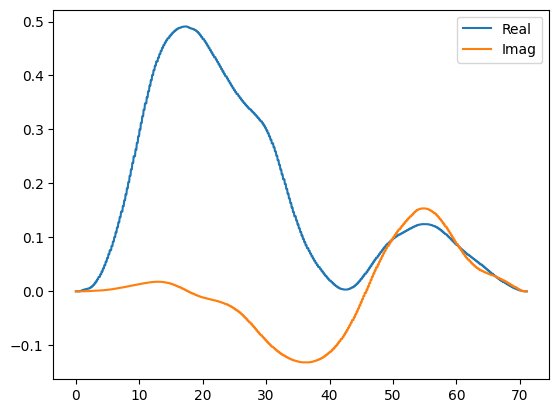

In [15]:
idx = 0

direction_params = {
    "I_params": directions["I_params"][idx], 
    "Q_params": directions["Q_params"][idx],
    "phase": 0. #phase doesn't matter for plotting envelopes
}

direction_sig = signal_parameterizations['sigX'](direction_params)
direction_sig.draw(0, T, 1000, function="envelope")

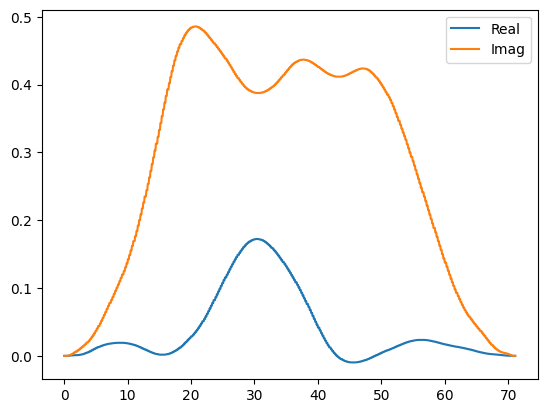

In [16]:
idx = 1

direction_params = {
    "I_params": directions["I_params"][idx], 
    "Q_params": directions["Q_params"][idx],
    "phase": 0. #phase doesn't matter for plotting envelopes
}

direction_sig = signal_parameterizations['sigX'](direction_params)
direction_sig.draw(0, T, 1000, function="envelope")

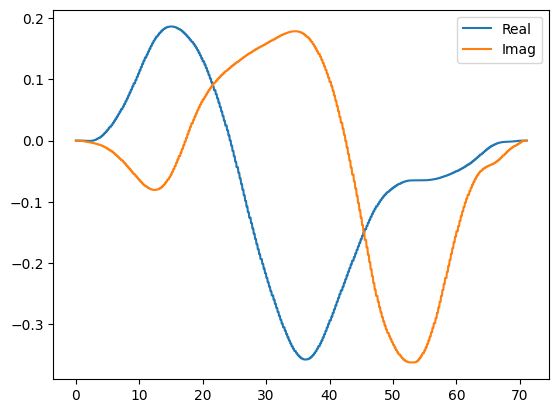

In [19]:
idx = 2

direction_params = {
    "I_params": directions["I_params"][idx], 
    "Q_params": directions["Q_params"][idx],
    "phase": 0. #phase doesn't matter for plotting envelopes
}

direction_sig = signal_parameterizations['sigX'](direction_params)
direction_sig.draw(0, T, 1000, function="envelope")

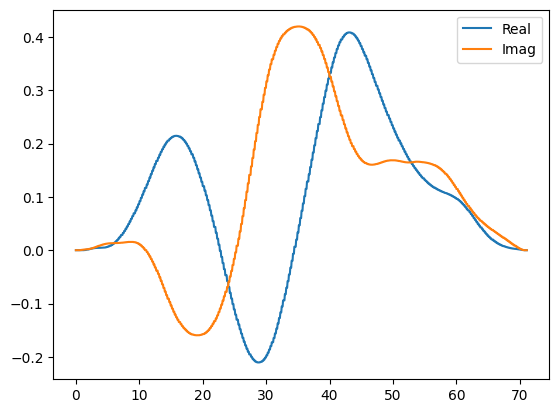

In [20]:
idx = 3

direction_params = {
    "I_params": directions["I_params"][idx], 
    "Q_params": directions["Q_params"][idx],
    "phase": 0. #phase doesn't matter for plotting envelopes
}

direction_sig = signal_parameterizations['sigX'](direction_params)
direction_sig.draw(0, T, 1000, function="envelope")